<a href="https://colab.research.google.com/github/kobena247/kobena247/blob/main/DataGroupProject_AyimBoateng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This program scrapes data from the web and visualizes it
@author: Michael Ayim-Boateng
"""
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
!pip install highlight_text
from highlight_text import ax_text, fig_text


In [ ]:
"""This section is for scraping highest paying jobs in comp sci off the web"""

#url to be used
url = 'https://www.computersciencedegreehub.com/best/best-paying-computer-science-jobs/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
jobs = [re.sub(r'[\d\s\'.]+','',job.get_text(strip=True)) for job in soup.find_all('h3')]
salaries = [salaries.get_text(strip=True).replace('$','').replace(',','') for salaries in soup.find_all('h4')]

jobTitle = jobs[:len(salaries)]
# Changing the salary values from string to int
salaries = pd.to_numeric(salaries)

# Creating dataframe
data = pd.DataFrame({
    'Job Title': jobTitle,
    'Salary($K)': salaries/1000
})

# Sorting the data and selecting the top N highest paying jobs
topN = 10
sortedData = data.sort_values(by='Salary($K)', ascending=False).head(topN)



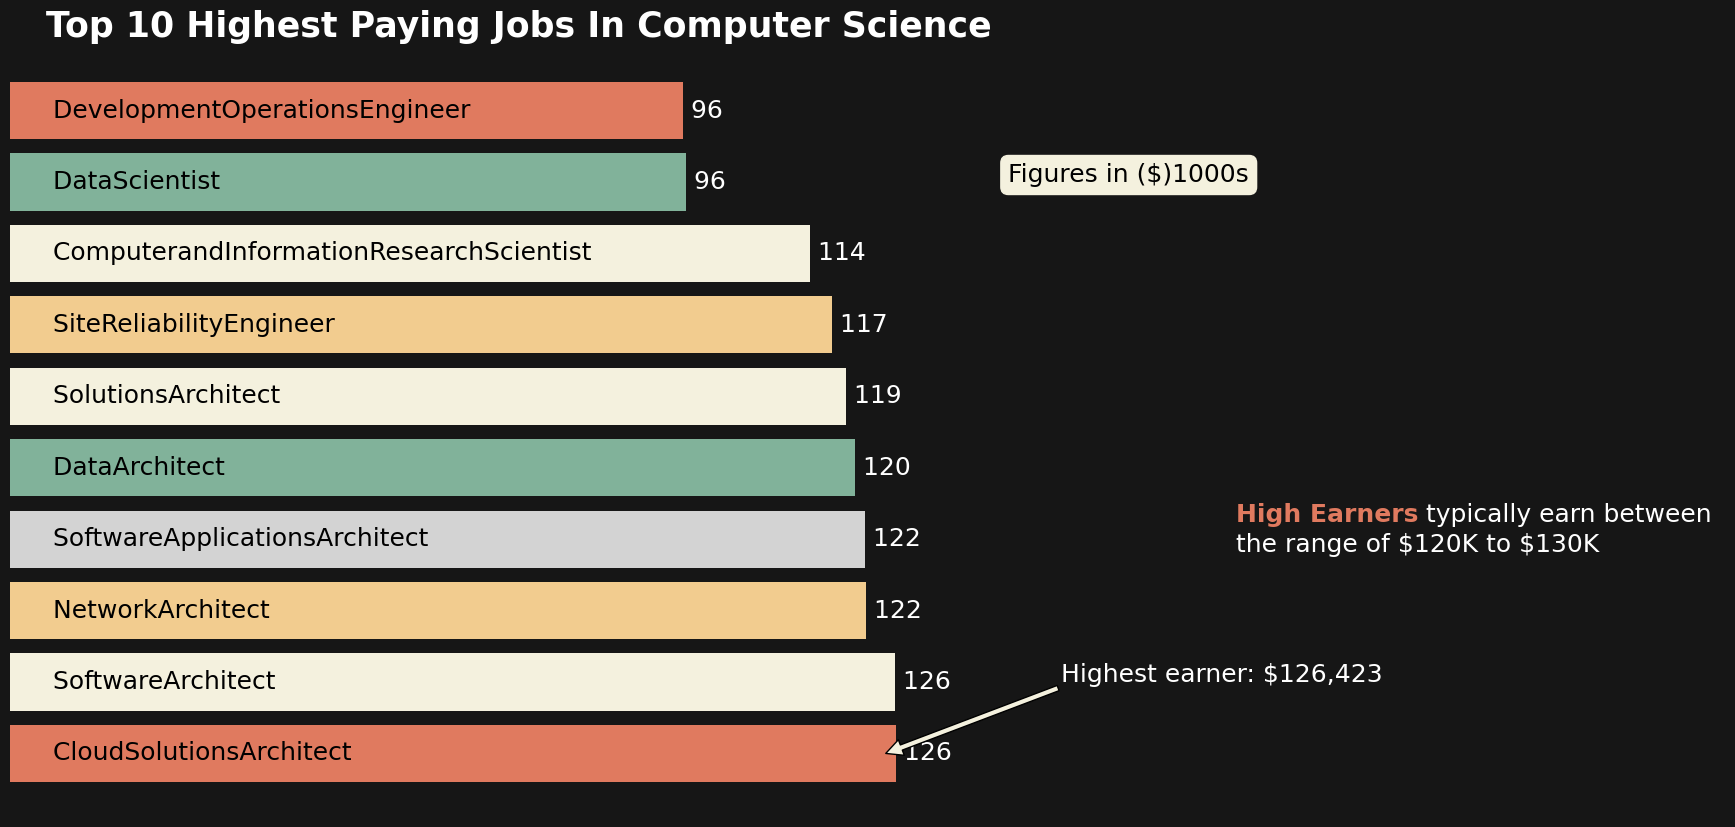

In [ ]:
"""
This section initializes the figure for the data visualizations of the highet
paying job in comp sci
"""

fig, ax = plt.subplots(figsize=(12, 10))

#removing axis
ax.axis('off')

colors = {
    'CloudSolutionsArchitect': '#e07a5f',
    'SoftwareArchitect': '#f4f1de',
    'NetworkArchitect': '#f2cc8f',
    'SoftwareApplicationsArchitect': 'lightgrey',
    'DataArchitect': '#81b29a',
    'SolutionsArchitect': '#f4f1de',
    'SiteReliabilityEngineer': '#f2cc8f',
    'ComputerandInformationResearchScientist': '#f4f1de',
    'DataScientist': '#81b29a',
    'DevelopmentOperationsEngineer': '#e07a5f'
}
c = [colors[category] for category in sortedData['Job Title']]
backgroundColor = '#161616'
fig.set_facecolor(backgroundColor)
ax.set_facecolor(backgroundColor)
textColor = 'white'


scale_factor = 2.0
scaled_salaries = [salary * scale_factor for salary in sortedData['Salary($K)']]

ax.barh(sortedData['Job Title'], scaled_salaries, color=c)
for i, (title, salary) in enumerate(zip(sortedData['Job Title'], scaled_salaries)):
    if title.startswith('CloudSolutionsArchitect'):
        title = 'CloudSolutionsArchitect'
    elif title.startswith('SoftwareArchitect'):
        title = 'SoftwareArchitect'
    elif title.startswith('NetworkArchitect'):
        title = 'NetworkArchitect'
    elif title.startswith('SoftwareApplicationsArchitect'):
        title = 'SoftwareApplicationsArchitect'
    elif title.startswith('DataArchitect'):
        title = 'DataArchitect'
    elif title.startswith('SolutionsArchitect'):
        title = 'SolutionsArchitect'
    elif title.startswith('SiteReliabilityEngineer'):
        title = 'SiteReliabilityEngineer'
    elif title.startswith('ComputerandInformationResearchScientist'):
        title = 'ComputerandInformationResearchScientist'
    elif title.startswith('DataScientist'):
        title = 'DataScientist'
    elif title.startswith('DevelopmentOperationsEngineer'):
        title = 'DevelopmentOperationsEngineer'

    ax.text(x=10, y=i, s=f' {title}',
            ha='left', va='center', fontsize=18, color='black')
    ax.text(x=salary, y=i, s=f' {int(salary / scale_factor)}',
            ha='left', va='center', fontsize=18, color=textColor)

title = "Top 10 Highest Paying Jobs In Computer Science"
fig.text(x=0.155, y=0.9, s=title, fontsize=25, ha='left',
         va='center', weight='bold',color=textColor)
plt.text(285, 8, 'Figures in ($)1000s', bbox=dict(facecolor='#f4f1de', edgecolor='#f4f1de', boxstyle='round'), fontsize =18, color='black')

text = '<High Earners> typically earn between \nthe range of \$120K to \$130K'
ax_text(x=350, y =3.5, s=text, color=textColor, fontsize=18,
        highlight_textprops=[{'color':colors['CloudSolutionsArchitect'],'fontweight':'bold'}])

plt.annotate('Highest earner: $126,423', xy =(250, 0), xytext=(300,1), fontsize= 18,color='white',arrowprops=dict(facecolor='#f4f1de'))

plt.show()

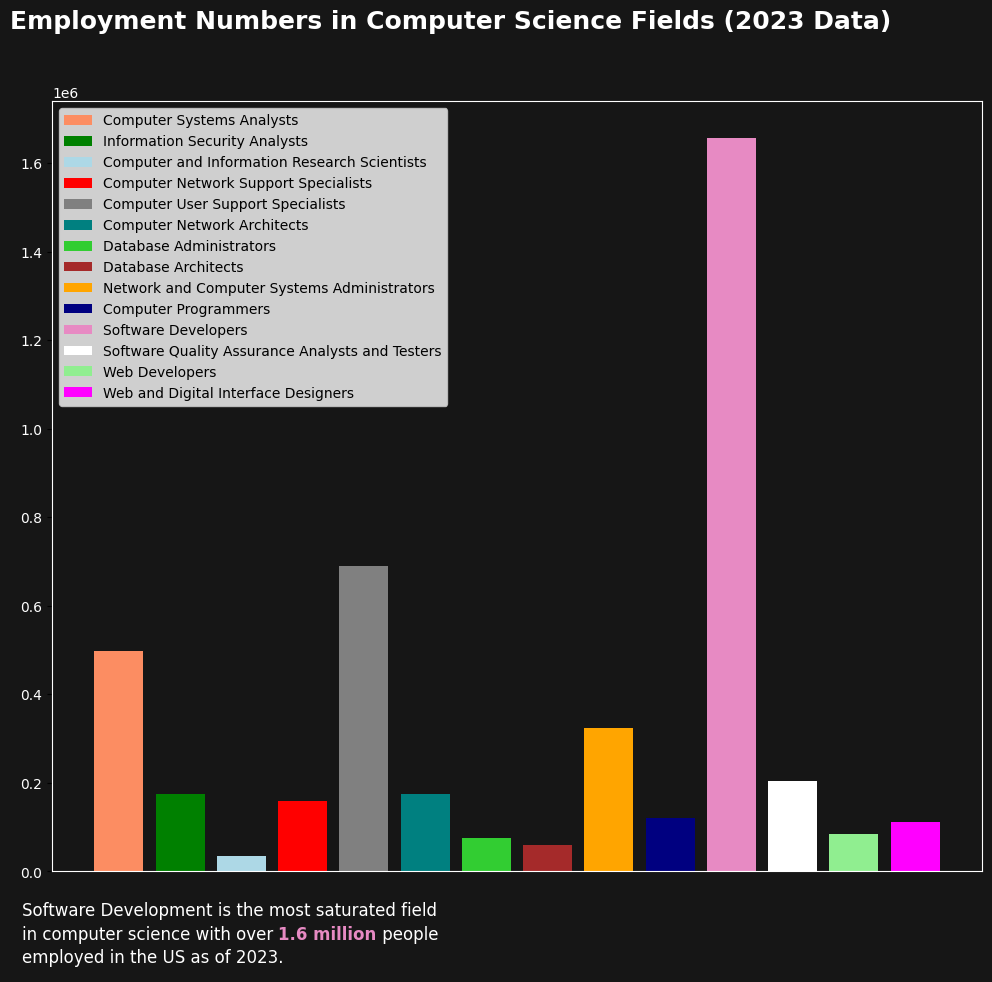

In [ ]:
"""This section is for saturation of fields by employment numbers"""

filePath = '/content/drive/MyDrive/Colab Notebooks/jobstat.xlsx'

#processing file and converting to dataframe
df = pd.read_excel(filePath)
df = df[['OCC_TITLE','TOT_EMP','O_GROUP']]
df = df.iloc[132:153]
jobs = df[[title == 'detailed' for title in df['O_GROUP']]]

#creating list
jobTitles = [title for title in jobs['OCC_TITLE'] ]
employmentNums = [num for num in jobs['TOT_EMP']]

data = pd.DataFrame({
    'Occupation': jobTitles,
    'Employment Numbers': employmentNums
})

sortedData = data.sort_values(by='Employment Numbers', ascending=False).head(14)

fig, ax = plt.subplots(figsize=(12,10))
backgroundColor = '#161616'
fig.set_facecolor(backgroundColor)
ax.set_facecolor(backgroundColor)

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', labelcolor='white')
plt.xticks([])

colors = ['#fc8d62','green','lightblue','red','grey','teal','limegreen',
 'brown','orange','navy','#e78ac3', 'white','lightgreen', 'magenta']
ax.bar(jobTitles, employmentNums, label = jobTitles, color = colors)

title = 'Employment Numbers in Computer Science Fields (2023 Data)'
fig.text(x=0.09, y =0.96, s=title, weight='bold', color='white', fontsize=18,ha='left',va='center')
text = 'Software Development is the most saturated field \nin computer science with over <1.6 million> people \nemployed in the US as of 2023.'
fig_text(x=0.1, y=0.08, s=text, color='white',fontsize=12,
        highlight_textprops=[{'color':'#e78ac3','fontweight':'bold'}])

ax.legend(loc='best',fontsize='medium')
plt.show()


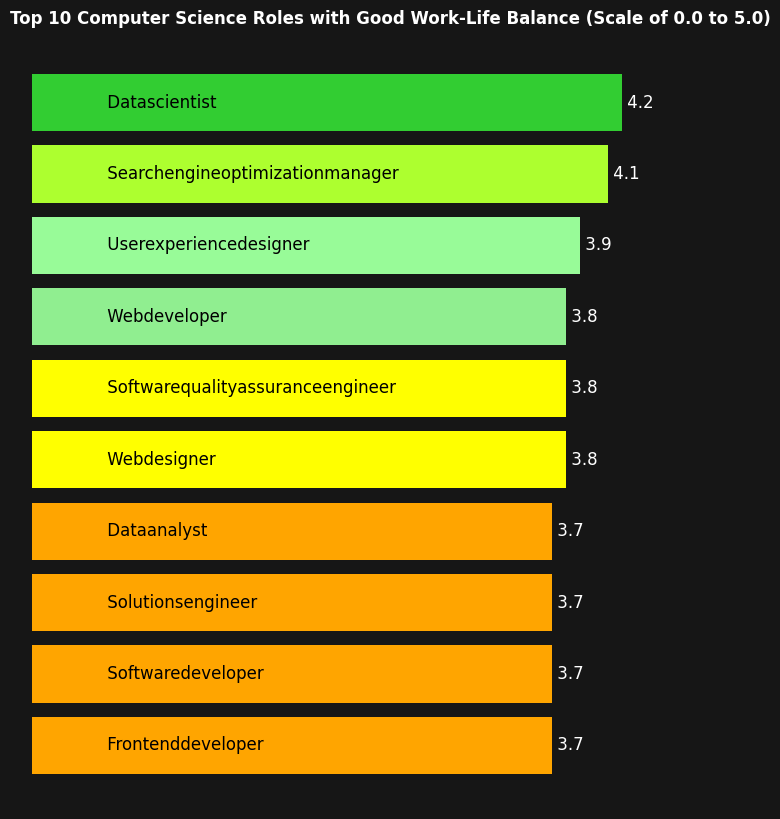

In [ ]:
url = 'https://www.businessinsider.com/best-tech-jobs-for-work-life-balance-2015-10'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

scale = ['5.0','4.9','4.8','4.7','4.6','4.5','4.4',
         '4.3','4.2','4.1','4.0','3.9','3.8','3.7','3.6',
         '3.5','3.4','3.3','3.2','3.1','3.0']

titles = [re.sub(r'[\d\s\'.]+','',title.get_text(strip=True)) for title in soup.find_all('h2')]
titles = titles[:10]

ratings = [re.findall(r'\b\d+\.\d+\b', rate.get_text(strip=True)) for rate in soup.find_all('p')]
ratings = [rate for rate in ratings if rate]
ratings = [float(rate[0]) for rate in ratings]
ratings.pop(0)

#creating dataframe
rateData = pd.DataFrame({
    'Title': titles,
    'Ratings': ratings
})


fig, ax = plt.subplots(figsize=(8,10))
fig.set_facecolor('#161616')
ax.set_facecolor('#161616')

colors = {
    'Datascientist': 'limegreen',
    'Searchengineoptimizationmanager': 'greenyellow',
    'Userexperiencedesigner': 'palegreen',
    'Webdeveloper': 'lightgreen',
    'Softwarequalityassuranceengineer': 'yellow',
    'Webdesigner': 'yellow',
    'Dataanalyst': 'orange',
    'Solutionsengineer': 'orange',
    'Softwaredeveloper': 'orange',
    'Frontenddeveloper': 'orange'
}

c = [colors[category] for category in rateData['Title']]

ax.barh(rateData['Title'], rateData['Ratings'], color = c)
for i, (rate, name) in enumerate(zip(rateData['Ratings'],
                                      rateData['Title'])):
    if name.startswith('Datascientist'):
      name = 'Datascientist'
    elif name.startswith('Searchengineoptimizationmanager'):
      name = 'Searchengineoptimizationmanager'
    elif name.startswith('Userexperiencedesigner'):
      name = 'Userexperiencedesigner'
    elif name.startswith('Webdeveloper'):
      name = 'Webdeveloper'
    elif name.startswith('Softwarequalityassuranceengineer'):
      name = 'Softwarequalityassuranceengineer'
    elif name.startswith('Webdesigner'):
      name = 'Webdesigner'
    elif name.startswith('Dataanalyst'):
      name = 'Dataanalyst'
    elif name.startswith('Solutionengineer'):
      name = 'Solutionsengineer'
    elif name.startswith('Softwaredeveloper'):
      name = 'Softwaredeveloper'
    elif name.startswith('Frontdeveloper'):
      name = 'Frontdeveloper'


    ax.text(x=0.5, y=i, s=f' {name}',
            ha='left', va='center', fontsize=12, color='black')
    ax.text(x=rate, y=i, s=f' {(rate)}',
            ha='left', va='center', fontsize=12, color='white')

title ='Top 10 Computer Science Roles with Good Work-Life Balance (Scale of 0.0 to 5.0)'
fig.text(x=0.098, y =0.9, s=title, weight='bold', color='white', fontsize=12,ha='left',va='center')

ax.axis('off')

plt.show()
